In [1]:
from urllib.request import urlretrieve
import pandas as pd
# import jovian
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
# urlretrieve(medical_charges_url,'medical.csv')

In [3]:
medical_data = pd.read_csv('medical.csv')
medical_data
print(medical_data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
import matplotlib

In [7]:
# sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [8]:
fig = px.histogram(medical_data,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of age')
fig.update_layout(bargap=0.1)
# fig.show()

## For Body Mass index

In [9]:
fig = px.histogram(medical_data,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title="Distibution of BMI"
                )
fig.update_layout(bargap=0.1)
# fig.show()

### Charges

In [10]:
fig = px.histogram(medical_data,
                    x = 'charges',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['green', 'gray'],
                    title="Annual Medical Charges"
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
# Charges according to Sex
fig = px.histogram(medical_data,
                    x = 'charges',
                    marginal='box',
                    color='sex',
                    color_discrete_sequence=['green', 'gray'],
                    title="Annual Medical Charges"
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
# Charges according to Region
fig = px.histogram(medical_data,
                    x = 'charges',
                    marginal='box',
                    color='region',
                    color_discrete_sequence=['green', 'orange','red', 'blue'],
                    title="Annual Medical Charges"
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
medical_data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
px.histogram(medical_data,x='smoker',color='sex',title='Smoker')

### Age and Charges

In [15]:
fig = px.scatter(medical_data,
                    x = 'age',
                    y = 'charges',
                    color='smoker',
                    opacity=0.8,
                    hover_data=['sex','region'],
                    title="Age Vs. Charges"
                   )
fig.update_traces(marker_size=5)
fig.show()

### BMI and Charges

In [16]:
fig = px.scatter(medical_data,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title="BMI Vs. Charges")
fig.update_traces(marker_size=5)
fig.show()

In [17]:
# charges according to children
px.violin(medical_data,x='children',y='charges')

<Axes: xlabel='sex', ylabel='charges'>

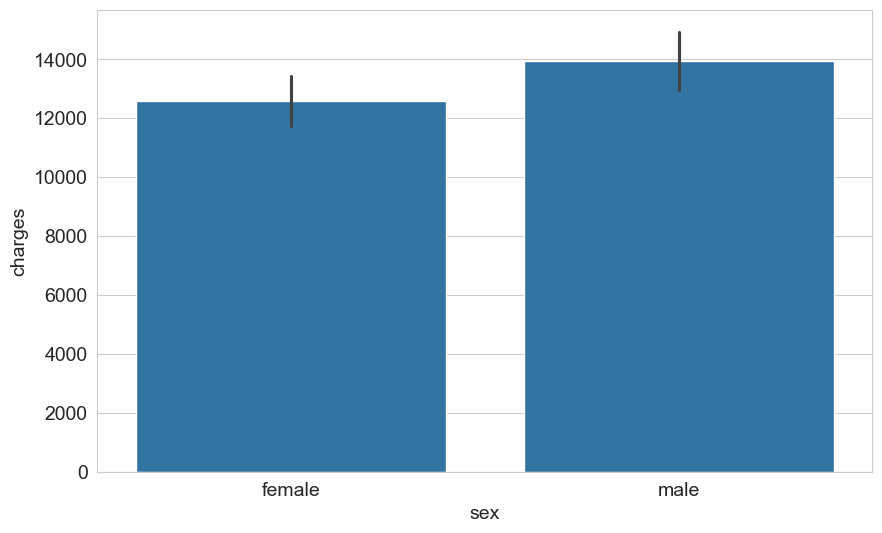

In [28]:
sns.set_style('whitegrid')
sns.barplot(medical_data,
            x='sex',
            y='charges')

## Correlation Coefficient

In [19]:
medical_data.charges.corr(medical_data.age)

0.2990081933306478

In [20]:
medical_data.charges.corr(medical_data.bmi)

0.19834096883362887

In [22]:
smoker_values = {'no':0, 'yes': 1}
smoker_numeric = medical_data.smoker.map(smoker_values)
medical_data.charges.corr(smoker_numeric)

0.7872514304984778

In [24]:
medical_data.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

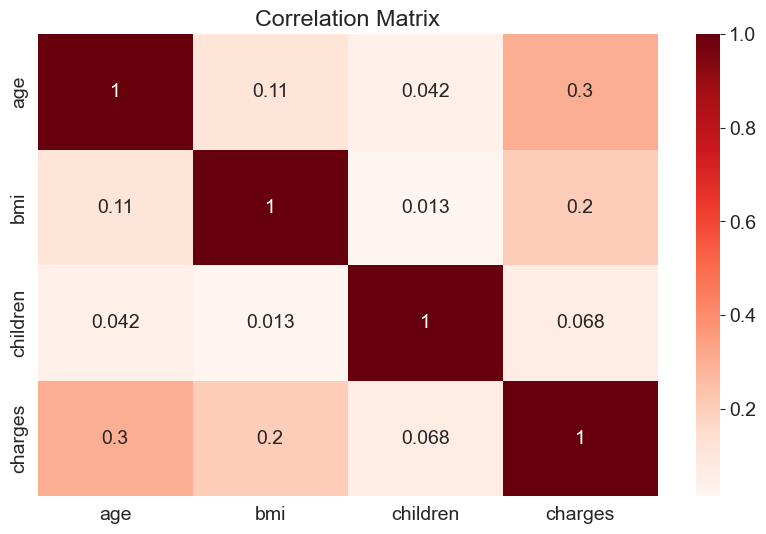

In [29]:
sns.heatmap(medical_data.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

## Linear Regression using a Single Feature

In [26]:
non_smoker_df = medical_data[medical_data.smoker == 'no']

<Axes: title={'center': 'Age Vs. Charges'}, xlabel='age', ylabel='charges'>

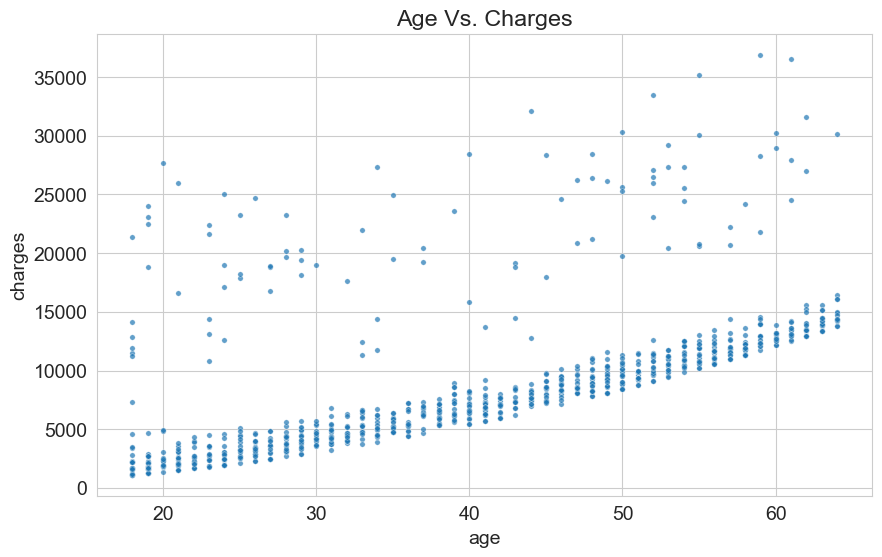

In [30]:
plt.title('Age Vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges',alpha=0.7,s=15)

In [31]:
def estimate_charges(age, w, b):
    return w * age + b


In [32]:
w = 50
b = 100

In [33]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

Text(0, 0.5, 'Estimated Charges')

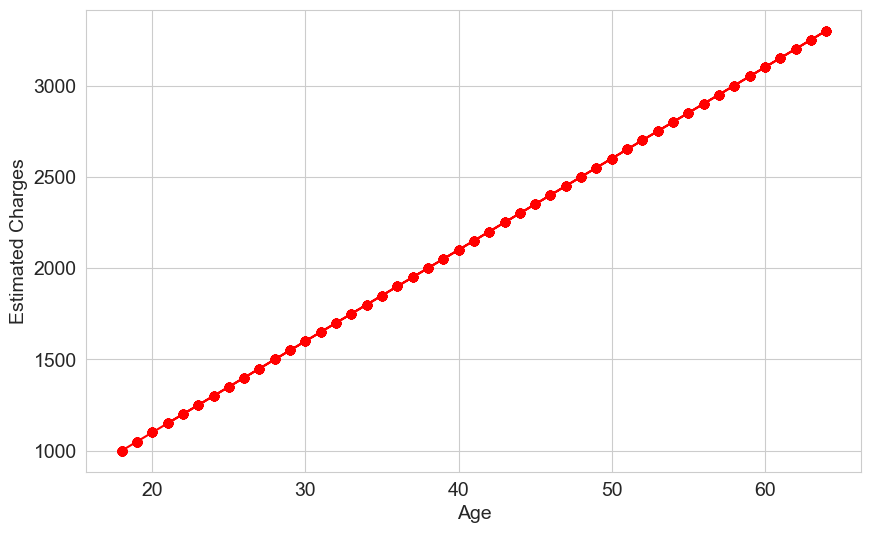

In [35]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

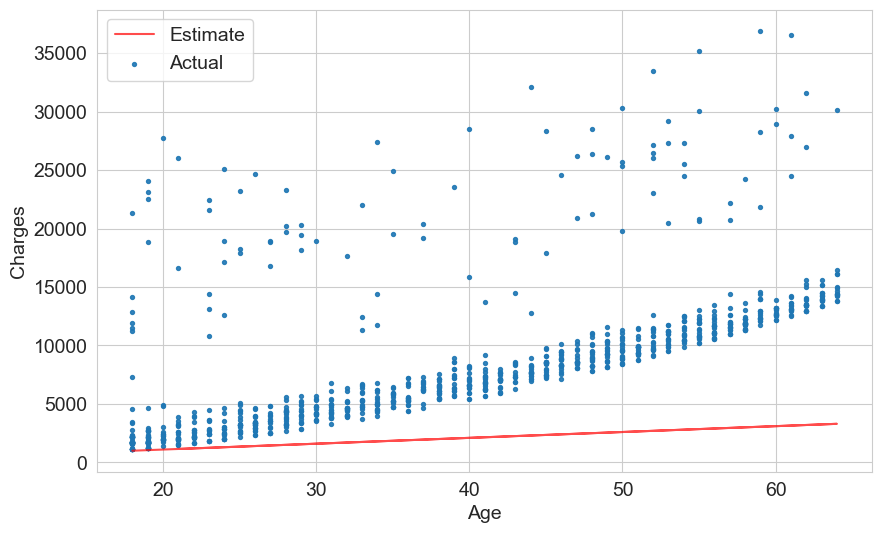

In [37]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.7)
plt.scatter(ages, target, s=8, alpha=0.9)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])


In [38]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

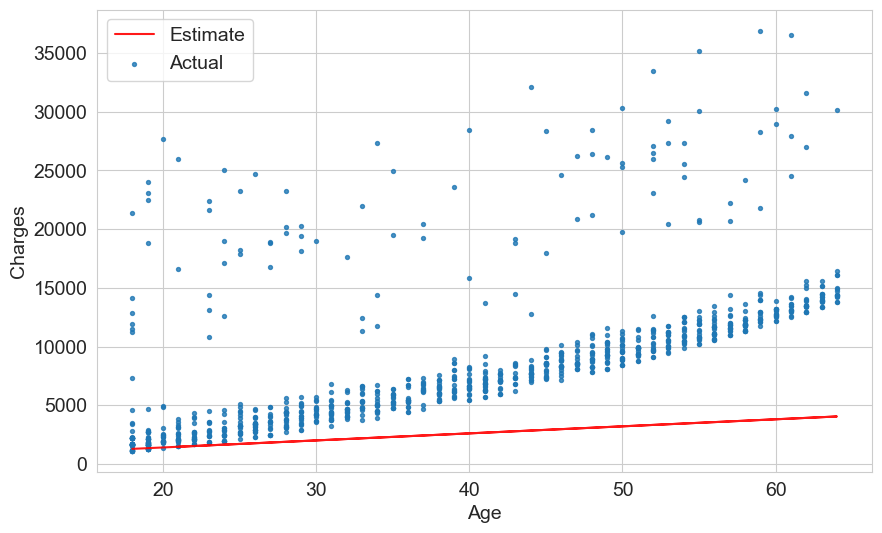

In [39]:
try_parameters(60, 200)

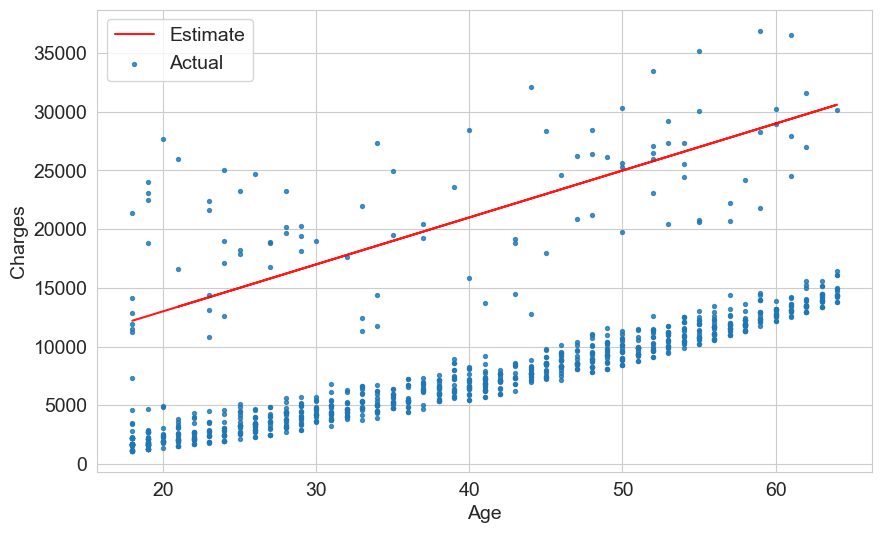

In [40]:
try_parameters(400, 5000)

In [41]:
import numpy as np

In [42]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

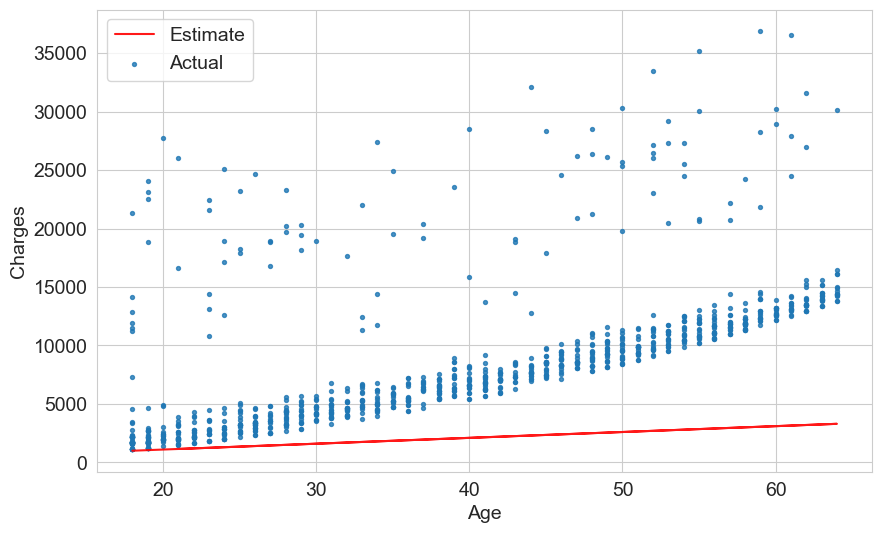

In [43]:
try_parameters(50, 100)

In [44]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [45]:
rmse(targets, predicted)

8461.949562575493

In [46]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4725.9133994520325


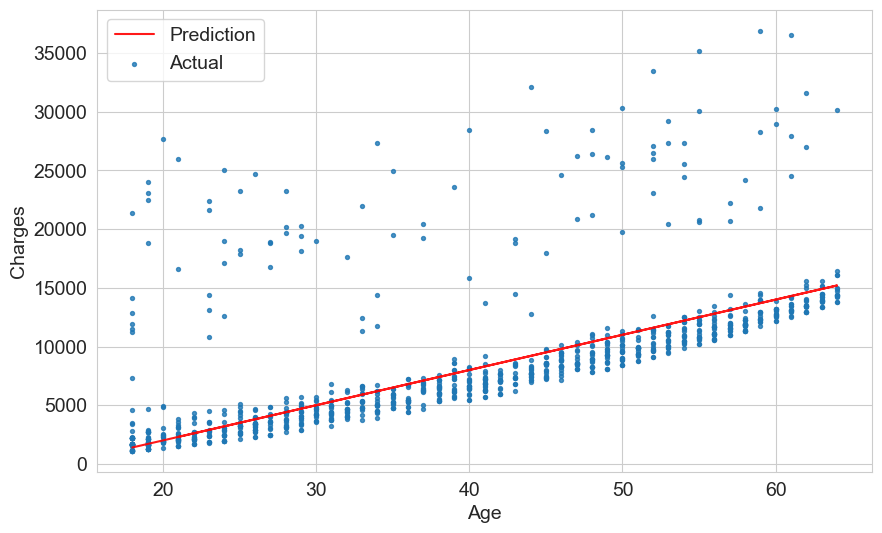

In [68]:
try_parameters(300, -4000)


In [ ]:
pip install scikit-learn

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [71]:
model = LinearRegression()

In [72]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [74]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('Input Shape: ', inputs.shape)
print('targets Shape: ', targets.shape)

Input Shape:  (1064, 1)
targets Shape:  (1064,)


In [76]:
model.fit(inputs, targets)

LinearRegression()

In [78]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [79]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [80]:
rmse(targets, predictions)

4662.505766636395

In [81]:
model.coef_

array([267.24891283])

In [82]:
model.intercept_

-2091.4205565650864

RMSE Loss:  4662.505766636395


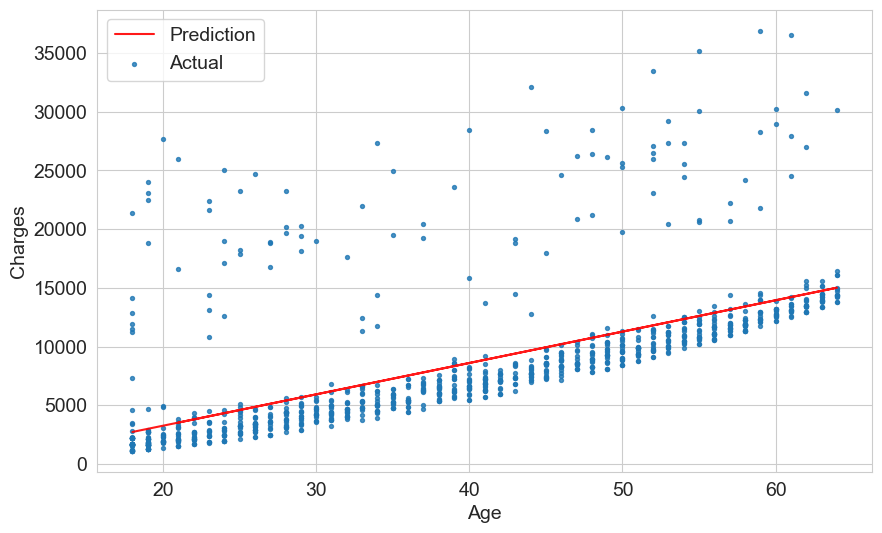

In [83]:
try_parameters(model.coef_, model.intercept_)

### Using Stocastic Gradient Descent Regressor(SGDRegressor)

In [85]:
model1 = SGDRegressor()
model1.fit(inputs, targets)

SGDRegressor()

In [89]:
predictions1 = model1.predict(inputs)
predictions1

array([2709.18205637, 4125.42730271, 4833.54992588, ..., 2709.18205637,
       2709.18205637, 3134.05563027])

In [87]:
model1.coef_

array([141.62452463])

In [88]:
model1.intercept_

array([159.94061296])

In [90]:
rmse(targets, predictions1)

5668.925664556775

RMSE Loss:  5668.925664556775


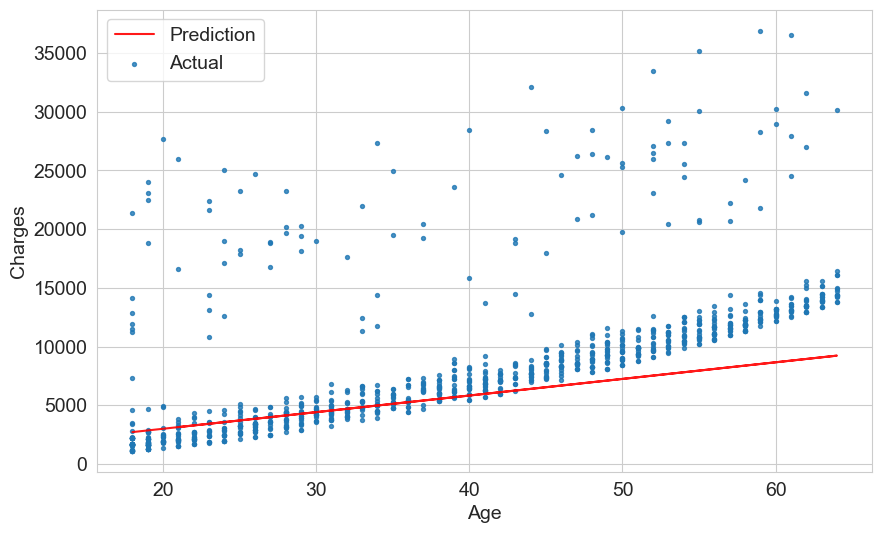

In [91]:
try_parameters(model1.coef_, model1.intercept_)

## Linear Regression using Multiple features

In [92]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.3128354612945


In [93]:
# Including children column also
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4608.470405038246


### Using only smoker dataset

In [95]:
smoker_df = medical_data[medical_data['smoker'] == 'yes']
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [96]:
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  5718.202480524154


### Using whole dataset

In [94]:
inputs, targets = medical_data[['age', 'bmi', 'children']], medical_data['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  11355.317901125973


## Using categorical features for Machine Learning

### Binary Category

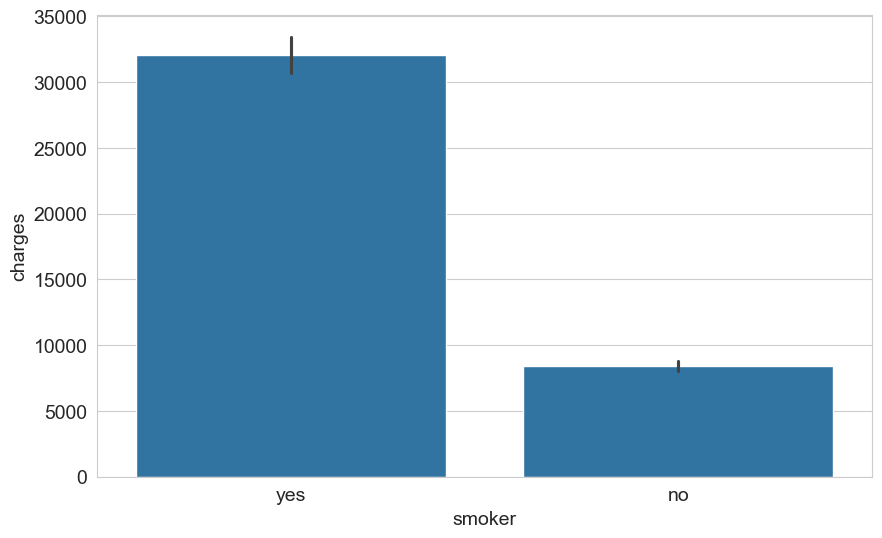

In [104]:
# Using smoker data

sns.barplot(data=medical_data, x='smoker', y='charges');


In [100]:
smoker_codes = {'no':0, 'yes':1}
medical_data['smoker_codes'] = medical_data.smoker.map(smoker_codes)

In [101]:
medical_data

,age,sex,bmi,children,smoker,region,charges,smoker_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [103]:
inputs, targets = medical_data[['age', 'bmi', 'children', 'smoker_codes']], medical_data['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188081


In [105]:
# Using Sex data

sex_codes = {'female':0, 'male':1}
medical_data['sex_codes'] = medical_data.sex.map(sex_codes)

In [106]:
medical_data.charges.corr(medical_data.sex_codes)

0.05729206220202533

In [107]:
inputs, targets = medical_data[['age', 'bmi', 'children', 'smoker_codes', 'sex_codes']], medical_data['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.100708754546


### One Hot Encoding

In [109]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_data[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [110]:
one_hot = enc.transform(medical_data[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [111]:
medical_data[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_data

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [112]:
inputs, targets = medical_data[['age', 'bmi', 'children', 'smoker_codes', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']], medical_data['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.6796511744515


In [113]:
# for smokers
smoker_df = medical_data[medical_data['smoker'] == 'yes']
inputs, targets = smoker_df[['age', 'bmi', 'children', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']], smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  5668.4678821121515


In [114]:
# For Non Smokers
non_smoker_df = medical_data[medical_data['smoker'] == 'no']
inputs, targets = non_smoker_df[['age', 'bmi', 'children', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4573.074988795492


### Feature Scaling

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_data[numeric_cols])

StandardScaler()

In [117]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [118]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [119]:
scaled_input = scaler.transform(medical_data[numeric_cols])
scaled_input

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [120]:
cat_cols = ['smoker_codes', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_data[cat_cols].values

In [122]:
inputs = np.concatenate((scaled_input, categorical_data), axis=1)
targets = medical_data.charges


In [123]:
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.679651174452
